In [711]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import yfinance as yf
plt.style.use('ggplot')

In [712]:
df=pd.read_csv('twitter_sentiment_data.csv')

In [713]:
df = df[~df['symbol'].isin(['ATVI', 'MRO'])]

In [714]:
df.head()

,date,symbol,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
0,2021-11-18,AAPL,811.0,2592.0,21674.0,7981808.0,NaN
1,2021-11-18,ABT,21.0,3.0,13.0,64089.0,NaN
2,2021-11-18,AMD,150.0,675.0,2949.0,1645270.0,NaN
3,2021-11-18,AMZN,557.0,1315.0,12969.0,5590695.0,NaN
5,2021-11-18,BA,61.0,55.0,342.0,425847.0,NaN


In [715]:
df['symbol']

0        AAPL
1         ABT
2         AMD
3        AMZN
5          BA
         ... 
27230     TMO
27231    TSLA
27232     TSN
27233       V
27234     XOM
Name: symbol, Length: 26487, dtype: object

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26487 entries, 0 to 27234
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                26487 non-null  object 
 1   symbol              26487 non-null  object 
 2   twitterPosts        26487 non-null  float64
 3   twitterComments     26487 non-null  float64
 4   twitterLikes        26487 non-null  float64
 5   twitterImpressions  26487 non-null  float64
 6   twitterSentiment    22364 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [717]:
df.describe()

,twitterPosts,twitterComments,twitterLikes,twitterImpressions,twitterSentiment
count,26487.000000,2.648700e+04,2.648700e+04,2.648700e+04,22364.000000
mean,549.662098,1.032002e+05,2.498216e+05,3.793865e+06,0.540410
std,1520.986817,1.602644e+06,3.208289e+06,1.247213e+07,0.071470
min,21.000000,0.000000e+00,0.000000e+00,8.880000e+02,0.000000
25%,74.000000,8.700000e+01,3.795000e+02,3.097085e+05,0.521655
50%,182.000000,7.070000e+02,3.352000e+03,9.128500e+05,0.553596
75%,468.500000,4.530500e+03,2.103800e+04,2.705278e+06,0.578313
max,47044.000000,1.014674e+08,1.786642e+08,4.881733e+08,0.813610


In [718]:
df['date'] = pd.to_datetime(df['date'])
df=df.set_index(['date','symbol'])

In [719]:
df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           ABT             21.0              3.0          13.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 TMO             21.0              2.0          32.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  
date       symbol                                        
2021-11-18 AAPL             7981808.0               NaN  
           ABT                64089.0               NaN  
           AMD              1645270.0               NaN  
           AMZN             5590695.0               NaN  
           BA                425847.0               NaN  
...                               ...               ...  
2023-01-04 TMO                30857.0          0.610020  
           TSLA            55464921.0          0.543057  
           TSN                57207.0          0.561900  
           V                 139835.0          0.567286  
           XOM               483389.0          0.588914  

[26487 rows x 5 columns]

In [720]:
#Jyaada likes ba aur comment nhi ba toh malab boat ka activity ba oka ignore karai ke liye ye ratio nikalab agar boot nhi ba toh ratio 1 ke aas paas aaaye
df['engagement_ratio'] = df['twitterComments'] / df['twitterLikes']

In [721]:
df=df[(df['twitterLikes']>500)&(df['twitterComments']>200)]

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17186 entries, (Timestamp('2021-11-18 00:00:00'), 'AAPL') to (Timestamp('2023-01-04 00:00:00'), 'XOM')
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   twitterPosts        17186 non-null  float64
 1   twitterComments     17186 non-null  float64
 2   twitterLikes        17186 non-null  float64
 3   twitterImpressions  17186 non-null  float64
 4   twitterSentiment    14427 non-null  float64
 5   engagement_ratio    17186 non-null  float64
dtypes: float64(6)
memory usage: 878.1+ KB


Here, we will get top 5 stocks in a month to invest in

**Aggregate Monthly and calculate average sentiment for the month**
 Aggregate on a monthly level and calculate average monthly metric, for the one we choose

In [723]:
aggregated_df=(df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])[['engagement_ratio']].mean())

C:\Users\91870\AppData\Local\Temp\ipykernel_16160\2400282101.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aggregated_df=(df.reset_index('symbol').groupby([pd.Grouper(freq='M'),'symbol'])[['engagement_ratio']].mean())


In [724]:
aggregated_df

engagement_ratio
date       symbol                  
2021-11-30 AAPL            0.256318
           ABBV            0.214665
           ABT             0.235784
           AES             0.864613
           AMD             0.232432
...                             ...
2023-01-31 TMO             0.333313
           TSLA            0.151992
           TSN             0.400545
           V               0.194045
           XOM             0.217904

[1008 rows x 1 columns]

Now we will rank the companies based on this engagement ratio based on a monthly engagement

In [725]:
aggregated_df['rank']=aggregated_df.groupby(level=0)['engagement_ratio'].transform(lambda x: x.rank(ascending=False))

In [726]:
aggregated_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAPL            0.256318  18.0
           ABBV            0.214665  28.0
           ABT             0.235784  22.0
           AES             0.864613   3.0
           AMD             0.232432  23.0
...                             ...   ...
2023-01-31 TMO             0.333313  13.0
           TSLA            0.151992  57.0
           TSN             0.400545   8.0
           V               0.194045  49.0
           XOM             0.217904  43.0

[1008 rows x 2 columns]

**Select Top 5 stocks based on their cross-sectional ranking for each month**
 Select top 5 by rank for each month and fix the date to start at beginning of next month

In [727]:
filtered_df=aggregated_df[aggregated_df['rank']<6]

In [728]:
filtered_df=filtered_df.reset_index(level=1)

In [729]:
filtered_df.index = filtered_df.index + pd.DateOffset(1)

In [730]:
filtered_df

,symbol,engagement_ratio,rank
date,,,
2021-12-01,AES,0.864613,3.0
2021-12-01,BA,0.502031,5.0
2021-12-01,FCX,0.681592,4.0
2021-12-01,MNST,0.871301,2.0
2021-12-01,OXY,2.837725,1.0
...,...,...,...
2023-02-01,AES,0.890005,1.0
2023-02-01,BIIB,0.454681,4.0
2023-02-01,MDT,0.806841,2.0


In [731]:
filtered_df= filtered_df.reset_index().set_index(['date','symbol'])
filtered_df.head(20)

engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   3.0
           BA              0.502031   5.0
           FCX             0.681592   4.0
           MNST            0.871301   2.0
           OXY             2.837725   1.0
2022-01-01 BA              0.650160   4.0
           FCX             0.904821   2.0
           LUV             1.515975   1.0
           MA              0.870657   3.0
           OXY             0.637557   5.0
2022-02-01 AMD             0.715556   4.0
           D               3.144649   1.0
           FCX             0.655237   5.0
           LUV             1.062028   2.0
           MNST            0.833043   3.0
2022-03-01 FCX             1.206484   2.0
           GILD            0.586101   4.0
           LUV             1.574377   1.0
           OXY             1.025579   3.0
           PFE             0.445669   5.0

**Extract the stocks to form portfolios with at the start of each new month**
 Create a dictionary containing start of month and corresponded selected stocks

In [732]:
dates=filtered_df.index.get_level_values('date').unique().tolist()
fixed_dates={}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')]=filtered_df.xs(d, level=0).index.tolist()

fixed_dates

{'2021-12-01': ['AES', 'BA', 'FCX', 'MNST', 'OXY'],
 '2022-01-01': ['BA', 'FCX', 'LUV', 'MA', 'OXY'],
 '2022-02-01': ['AMD', 'D', 'FCX', 'LUV', 'MNST'],
 '2022-03-01': ['FCX', 'GILD', 'LUV', 'OXY', 'PFE'],
 '2022-04-01': ['CRM', 'DD', 'FCX', 'PM', 'STZ'],
 '2022-05-01': ['AMD', 'CRM', 'CVX', 'DD', 'PM'],
 '2022-06-01': ['DD', 'EL', 'K', 'KEY', 'LMT'],
 '2022-07-01': ['A', 'CRM', 'DD', 'FCX', 'MPC'],
 '2022-08-01': ['A', 'DD', 'JPM', 'MPC', 'STZ'],
 '2022-09-01': ['DIS', 'META', 'MRNA', 'PYPL', 'STZ'],
 '2022-10-01': ['DAL', 'DD', 'FCX', 'KEY', 'META'],
 '2022-11-01': ['A', 'AAL', 'FCX', 'META', 'MNST'],
 '2022-12-01': ['AES', 'J', 'KEY', 'L', 'STZ'],
 '2023-01-01': ['AES', 'DAL', 'KEY', 'NCLH', 'RCL'],
 '2023-02-01': ['AES', 'BIIB', 'MDT', 'NCLH', 'RCL']}

**Download fresh stock prices for only the selected stocks**

In [ ]:
stock_list=df.index.get_level_values('symbol').unique().tolist()
stock_data=yf.download(tickers=stock_list, start='2021-01-01', end='2023-03-01')

C:\Users\91870\AppData\Local\Temp\ipykernel_16160\1264461163.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data=yf.download(tickers=stock_list, start='2021-01-01', end='2023-03-01')
[*********************100%***********************]  81 of 83 completed

2 Failed downloads:
['BMY']: Timeout('Failed to perform, curl: (28) Operation timed out after 10678 milliseconds with 15595 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['XOM']: Timeout('Failed to perform, curl: (28) Operation timed out after 10741 milliseconds with 15595 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


[*********************100%***********************]  1 of 1 completed

In [734]:
stock_data

Price      Adj Close           Close                                 \
Ticker           BMY XOM           A    AAL         AAP        AAPL   
Date                                                                  
2021-01-04       NaN NaN  114.864685  15.13  140.622101  126.096542   
2021-01-05       NaN NaN  115.803818  15.43  140.470154  127.655609   
2021-01-06       NaN NaN  118.979424  15.52  148.585373  123.358536   
2021-01-07       NaN NaN  122.145378  15.38  149.854492  127.567932   
2021-01-08       NaN NaN  123.016731  15.13  151.990540  128.668991   
...              ...  ..         ...    ...         ...         ...   
2023-02-22       NaN NaN  139.212845  15.56  135.060944  147.063293   
2023-02-23       NaN NaN  140.310226  15.87  133.546875  147.547195   
2023-02-24       NaN NaN  138.350586  15.56  130.575195  144.890564   
2023-02-27       NaN NaN  139.310806  15.63  132.249100  146.085587   
2023-02-28       NaN NaN  139.105042  15.98  136.321045  145.581909   

Price                                                     ...   Volume  \
Ticker            ABBV         ABT        AEP        AES  ...      RCL   
Date                                                      ...            
2021-01-04   86.739700   99.687317  68.433525  19.330854  ...  5732800   
2021-01-05   87.636650  100.920723  68.341202  19.979650  ...  4029500   
2021-01-06   86.879601  100.710594  68.886711  20.778173  ...  3612500   
2021-01-07   87.809448  101.688202  67.048744  20.570223  ...  3993700   
2021-01-08   88.270271  101.971413  66.452866  21.144161  ...  3104200   
...                ...         ...        ...        ...  ...      ...   
2023-02-22  136.275528   97.309258  82.422302  22.388317  ...  2044600   
2023-02-23  137.541794   97.176598  82.322464  22.388317  ...  2066600   
2023-02-24  138.120651   95.196098  82.068382  22.326595  ...  2875100   
2023-02-27  139.540649   94.542267  81.741653  21.938618  ...  2459700   
2023-02-28  139.196930   96.390083  79.835846  21.762262  ...  3662300   

Price                                                                          \
Ticker         REGN       SLB      STZ         T      TMO       TSLA      TSN   
Date                                                                            
2021-01-04   911100   8743400  1202600  86700816  2220400  145914600  2177400   
2021-01-05   797700  16256600  1530200  83054520  2046700   96735600  2297100   
2021-01-06  1434700  19456300  1861700  73455520  2112300  134100000  1942200   
2021-01-07  1126600  14502400  2537100  71265359  2144400  154496700  2969400   
2021-01-08  1018800  11951900  1595400  72471656  2221700  225166500  2672400   
...             ...       ...      ...       ...      ...        ...      ...   
2023-02-22   415500   9181100  1092200  25308800  1705300  191828500  4217700   
2023-02-23   553300   6324500   979700  24845800  1160200  146360000  3403500   
2023-02-24   525900   8458700   702900  29138100   852600  142228100  2439300   
2023-02-27   557100   6287000   608200  22981100  1110600  161028300  3922200   
2023-02-28   622700  10634200  1136900  34154800  1188800  153144900  3556300   

Price                     
Ticker             V XOM  
Date                      
2021-01-04  10318300 NaN  
2021-01-05   6869700 NaN  
2021-01-06   7206200 NaN  
2021-01-07  10967900 NaN  
2021-01-08   6513000 NaN  
...              ...  ..  
2023-02-22   4621800 NaN  
2023-02-23   5533800 NaN  
2023-02-24   4414400 NaN  
2023-02-27   4255300 NaN  
2023-02-28   5385400 NaN  

[542 rows x 417 columns]

In [735]:
return_df= np.log(stock_data['Close']).diff().dropna()

In [736]:
print(return_df)

Empty DataFrame
Columns: [A, AAL, AAP, AAPL, ABBV, ABT, AEP, AES, ALB, AMD, AMZN, AVGO, BA, BIIB, BKR, BMY, C, CB, CCL, CMG, CRM, CVX, D, DAL, DD, DG, DIS, DLTR, DVN, EA, EBAY, EL, ENPH, ES, F, FCX, GILD, GOOG, GOOGL, GS, HBAN, HON, ILMN, INTC, J, JNJ, JPM, K, KEY, KO, L, LMT, LUV, MA, MDT, META, MNST, MO, MPC, MRNA, MSFT, MU, NCLH, NFLX, NKE, NUE, NVDA, OXY, PEP, PFE, PG, PM, PYPL, RCL, REGN, SLB, STZ, T, TMO, TSLA, TSN, V, XOM]
Index: []

[0 rows x 83 columns]


Calculate Portfolio Returns with monthly rebalancing

In [737]:
portfolio_df=pd.DataFrame()

for start_date in fixed_dates.keys():
    #print(start_date)
    end_date=(pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    cols=fixed_dates[start_date]
    #print(cols)
    temp_df=return_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    portfolio_df=pd.concat([portfolio_df,temp_df],axis=0)
print(portfolio_df)
    

Empty DataFrame
Columns: [portfolio_return]
Index: []


Now we will calculate the returns for that month

Now we will compare our return with standards i.e. NASDAQ 

In [738]:
qqq_df=yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')

C:\Users\91870\AppData\Local\Temp\ipykernel_16160\3258383157.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  qqq_df=yf.download(tickers='QQQ', start='2021-01-01', end='2023-03-01')
[*********************100%***********************]  1 of 1 completed


In [739]:
# handle both MultiIndex and single-level columns for qqq_df
if isinstance(qqq_df.columns, pd.MultiIndex):
    qqq_close = qqq_df[('Close', 'QQQ')]
else:
    qqq_close = qqq_df['Close']

# compute log returns (call diff())
qqq_ret = np.log(qqq_close).diff().rename('nasdaq_return').to_frame()

# merge / join with portfolio_df (fixing the misspelling potfolio_df)
portfolio_df = portfolio_df.merge(qqq_ret, left_index=True, right_index=True, how='left')


In [740]:
portfolio_df

,portfolio_return,nasdaq_return
Date,,


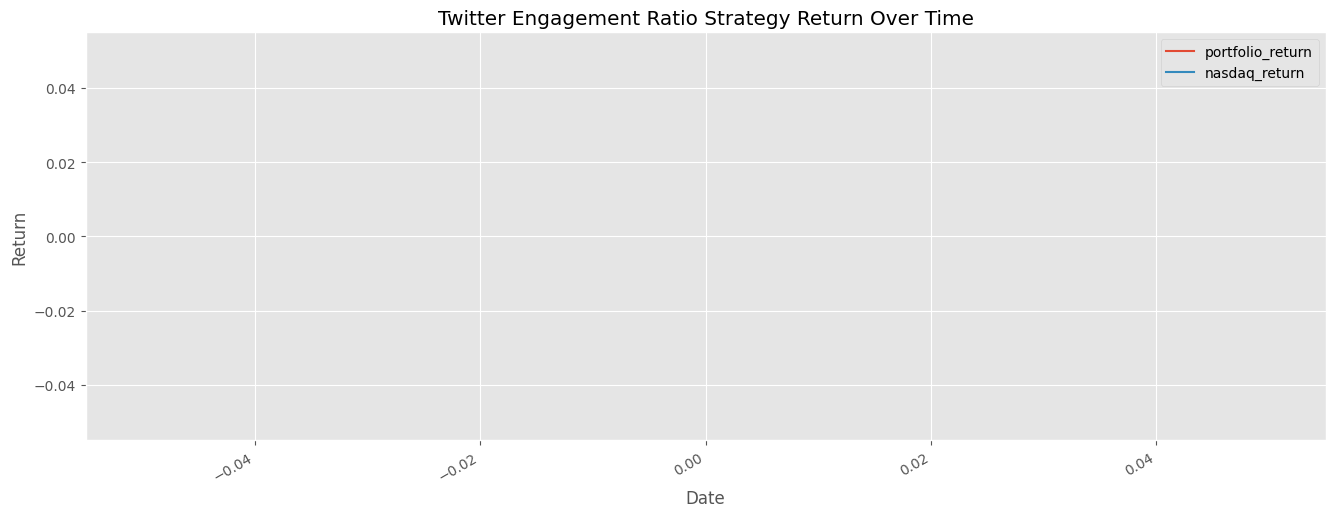

In [741]:
portfolios_cumlative_return=np.exp(np.log1p(portfolio_df).cumsum()).sub(1)
portfolios_cumlative_return.plot(figsize=(16,6))
plt.title('Twitter Engagement Ratio Strategy Return Over Time')

plt.ylabel('Return')
plt.show()